In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import argparse
from pathlib import Path 

import matplotlib.pyplot as plt
import pandas as pd 
from ml.data import ImageDataModule
from ml.vision.utils import plot_batches

from pipe import constants
from pipe import augmentations, constants

In [3]:
train = pd.read_csv('../data/train_folds.csv')
train.head()

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID,kfold
0,1.2.826.0.1.3680043.8.498.10980236531551060314...,0,0,0,0,0,0,0,0,1,1,0,5bd5d3480,3
1,1.2.826.0.1.3680043.8.498.31644041654883936177...,0,0,0,0,0,0,0,0,0,1,0,aa8997d29,2
2,1.2.826.0.1.3680043.8.498.92698499133241834162...,0,0,1,0,0,0,0,0,0,1,0,bed69bf48,4
3,1.2.826.0.1.3680043.8.498.10069138128460654269...,0,0,1,0,1,0,0,0,0,1,0,26da0d5ad,1
4,1.2.826.0.1.3680043.8.498.10994992736051720791...,0,0,1,0,0,1,0,0,0,0,0,96b87e845,2


## Plot a few batches

In [4]:
hparams = argparse.Namespace(
    train_data=constants.data_path / 'train_256',
    aug='baseline',
    sz=128
)

In [5]:
train_aug, _, _ = augmentations.augmentations_factory(hparams)

In [6]:
image_paths = [constants.data_path / f'train_256/{i}.jpg' for i in train.StudyInstanceUID]
dm = ImageDataModule(
    batch_size=32,
    train_image_paths=image_paths,
    train_augmentations=train_aug)
dm.setup()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


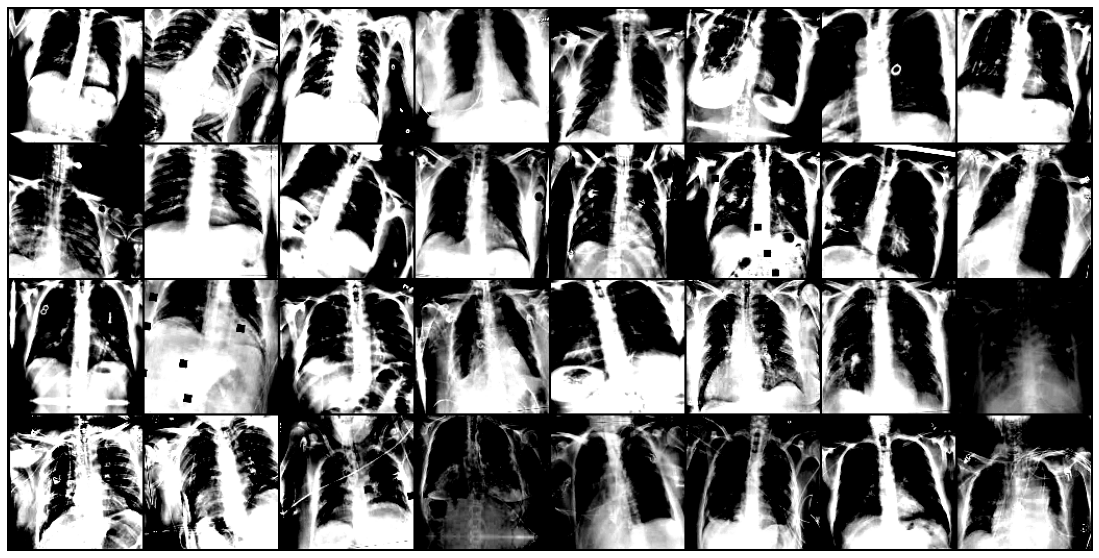

In [7]:
plot_batches(dl=dm.train_dataloader())